In [1]:
###############################
# Alunos
# André Ferreira Bem Silva
# Fernando D'Império
# Marcos Vinício Siqueira
###############################
# Neste arquivo estão contidos os três
# exercícios da mina de ouro
###############################
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy as sp
from scipy.stats import norm

In [2]:
class GoldMineExerciseBase(object):
    
    def __init__(self):
        #Problem constants
        self._gold_price = 400
        self._gold_cost = 300
        self._gold_volatility = 0.3
        self._half_square_gold_volatility = 0.5 * self._gold_volatility**2
        self._gold_extraction_quantity = 10_000
        self._risk_free_interest_rate = 0.1
        self._number_of_years = 10
    
    def _calc_results_for_year(self, gold_price_last_year, years_delta):
        return gold_price_last_year * math.exp((self._risk_free_interest_rate - self._half_square_gold_volatility) * years_delta + self._gold_volatility * math.sqrt(years_delta) * norm.ppf(np.random.uniform()))

    def run_mine_year_simulation(self):
        gold_prices = [self._gold_price for i in range(0, self._number_of_years)]
        for i in range(1, self._number_of_years):
            gold_prices[i] = self._calc_results_for_year(gold_price_last_year = gold_prices[i - 1], years_delta = 1)
            
        return gold_prices
    
    def _calculate_gold_quantity(self, gold_price):
        return 0 if gold_price < self._gold_cost else self._gold_extraction_quantity

    def calc_year_risk_from_index(self, i):
        return math.exp(-(i % self._number_of_years) * self._risk_free_interest_rate)
    
    def add_profit_and_npv_to_df(self, simulations_df):
        simulations_df['profit'] = (simulations_df['gold_price'] - simulations_df['gold_cost']) * simulations_df['gold_quantity']
        #simulations_df['npv'] = simulations_df.year.map(lambda i: simulations_df.iloc[i]['profit'] * self.calc_year_risk_from_index(i))
        simulations_df['npv'] = simulations_df['profit'] * simulations_df['year'].map(lambda year: self.calc_year_risk_from_index(year))
    
class GoldMineExercise1(GoldMineExerciseBase):
    def __init__(self):
        GoldMineExerciseBase.__init__(self)
        
    def _create_simulation(self, simulation_index):
        gold_prices = self.run_mine_year_simulation()
        output_rows = []
        
        for i in range(0, self._number_of_years):
            gold_price = gold_prices[i]
            
            output_rows.append({
                    'gold_price': gold_price, 
                    'gold_cost': self._gold_cost, 
                    'gold_quantity': self._calculate_gold_quantity(gold_price), 
                    'simulation': simulation_index,
                    'year': i
                })
            
        return pd.DataFrame(output_rows)
            
    def create_simulations(self, number_of_simulations):
        simulation_df = pd.DataFrame(columns = ['gold_price', 'gold_cost', 'gold_quantity', 'simulation', 'year'])
        
        return pd.concat(
            [self._create_simulation(simulation_index) for simulation_index in range(0, number_of_simulations)],
            ignore_index = True
        )

In [3]:
# Creates object to solve exercise 1
first_exercise = GoldMineExercise1()
simulations_df = first_exercise.create_simulations(50_000)
#Creates new columns to solve the problems
first_exercise.add_profit_and_npv_to_df(simulations_df)
simulations_df

,gold_cost,gold_price,gold_quantity,simulation,year,profit,npv
0,300,400.000000,10000,0,0,1.000000e+06,1.000000e+06
1,300,348.580064,10000,0,1,4.858006e+05,4.395706e+05
2,300,455.791939,10000,0,2,1.557919e+06,1.275517e+06
3,300,317.898138,10000,0,3,1.789814e+05,1.325927e+05
4,300,265.336622,0,0,4,-0.000000e+00,-0.000000e+00
5,300,267.759499,0,0,5,-0.000000e+00,-0.000000e+00
6,300,341.205915,10000,0,6,4.120592e+05,2.261429e+05
7,300,302.950390,10000,0,7,2.950390e+04,1.465120e+04
8,300,627.823253,10000,0,8,3.278233e+06,1.473005e+06
9,300,649.038167,10000,0,9,3.490382e+06,1.419083e+06


In [4]:
simulations_npv = simulations_df.groupby(['simulation'])['npv'].agg(sum)
# Solution for Exercise 1
print('Mean value = ', round(np.mean(simulations_npv), 2), ' Median  value = ', round(np.median(simulations_npv), 2))

Mean value =  20822509.22  Median  value =  14343296.32


Text(0, 0.5, '# Ocurrences')

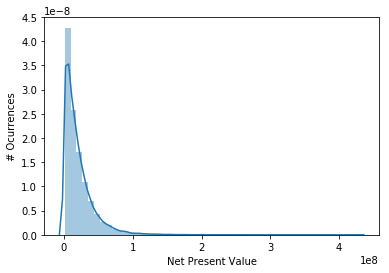

In [5]:
ax = sns.distplot(simulations_npv)
plt.xlabel('Net Present Value')
plt.ylabel('# Ocurrences')

In [6]:
class GoldMineExercise2(GoldMineExerciseBase):
    def __init__(self):
        GoldMineExerciseBase.__init__(self)
        self._gold_expansion_cost = 320
        self._gold_enhanced_extraction = 15_000
        self._expansion_total_cost = 8_000_000
        
    def add_build_costs_if_building_expansion(self, expand_now, expanded):
        return self._expansion_total_cost if expand_now != expanded else 0
        
    def expand_this_year_flag(self, cut_expand, gold_price):
        return cut_expand > gold_price
    
    def calc_gold_cost_expanded_or_not(self, expanded):
        return self._gold_expansion_cost if expanded else self._gold_cost
    
    def calc_gold_quantity_expanded_or_not(self, expanded):
        return self._gold_extraction_quantity if expanded else self._gold_enhanced_extraction
        
    def _create_simulation(self, simulation_index):
        simulation_columns = [
            'simulation', 'year', 'gold_price', 'gold_cost', 'gold_quantity', 
            'expanded', 'build_costs', 'cut_expand'
        ]
        simulation_df = pd.DataFrame(columns = simulation_columns)
        
        output_rows = [{
            'year': 0, 
            'simulation': simulation_index,
            'gold_price': self._gold_price, 
            'gold_cost': self._gold_cost,
            'gold_quantity': self._gold_extraction_quantity,
            'expanded': False, 
            'cut_expand': 0, 
            'build_costs' : 0,
        }]
        gold_year_prices = self.run_mine_year_simulation()
        
        for i in range(1, self._number_of_years):
            previous_year = i - 1
            cut_expand = random.randint(256, 2080)
            expanded = self.expand_this_year_flag(gold_year_prices[i], cut_expand) or output_rows[previous_year]['expanded']
            build_costs = self.add_build_costs_if_building_expansion(expanded, output_rows[previous_year]['expanded'])
            
            output_rows.append({
                'gold_price': gold_year_prices[i],
                'gold_cost': self.calc_gold_cost_expanded_or_not(output_rows[previous_year]['expanded']),
                'cut_expand': cut_expand,
                'expanded': expanded,
                'build_costs': build_costs,
                'simulation': simulation_index,
                'gold_quantity': self.calc_gold_quantity_expanded_or_not(output_rows[previous_year]['expanded']), 
                'year': i
            })
        
        return pd.DataFrame(output_rows)
    
    def create_simulations(self, number_of_simulations):
        simulations = [self._create_simulation(i) for i in range(0, number_of_simulations)]

        return pd.concat(simulations, ignore_index = True)
    
    def add_profit_and_npv_to_df(self, simulations_df):
        GoldMineExerciseBase.add_profit_and_npv_to_df(self, simulations_df)
        
        simulations_df['f_profit'] = (simulations_df['gold_price'] - simulations_df['gold_cost']) * simulations_df['gold_quantity'] - simulations_df['build_costs']
        simulations_df['f_npv'] = simulations_df['f_profit'] * simulations_df['year'].map(lambda year: self.calc_year_risk_from_index(year))

In [7]:
second_exercise = GoldMineExercise2() 
simulations2_df = second_exercise.create_simulations(50_000)
second_exercise.add_profit_and_npv_to_df(simulations2_df)
simulations2_df

,build_costs,cut_expand,expanded,gold_cost,gold_price,gold_quantity,simulation,year,profit,npv,f_profit,f_npv
0,0,0,False,300,400.000000,10000,0,0,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
1,0,620,False,300,547.214525,15000,0,1,3.708218e+06,3.355334e+06,3.708218e+06,3.355334e+06
2,8000000,349,True,300,598.418378,15000,0,2,4.476276e+06,3.664865e+06,-3.523724e+06,-2.884981e+06
3,0,999,True,320,789.635297,10000,0,3,4.696353e+06,3.479144e+06,4.696353e+06,3.479144e+06
4,0,2053,True,320,845.226060,10000,0,4,5.252261e+06,3.520696e+06,5.252261e+06,3.520696e+06
5,0,1305,True,320,858.521517,10000,0,5,5.385215e+06,3.266298e+06,5.385215e+06,3.266298e+06
6,0,1658,True,320,1121.093198,10000,0,6,8.010932e+06,4.396493e+06,8.010932e+06,4.396493e+06
7,0,1733,True,320,1352.513011,10000,0,7,1.032513e+07,5.127308e+06,1.032513e+07,5.127308e+06
8,0,1291,True,320,2027.787056,10000,0,8,1.707787e+07,7.673582e+06,1.707787e+07,7.673582e+06
9,0,874,True,320,1859.921734,10000,0,9,1.539922e+07,6.260855e+06,1.539922e+07,6.260855e+06


In [8]:
simulations2_npv = simulations2_df.groupby(['simulation'])['f_npv'].agg(sum)
# Solution for Exercise 2
print('Mean value = ', round(np.mean(simulations2_npv), 2), ' Median  value = ', round(np.median(simulations2_npv), 2))

Mean value =  19204613.77  Median  value =  13808634.41


Text(0, 0.5, '# Ocurrences')

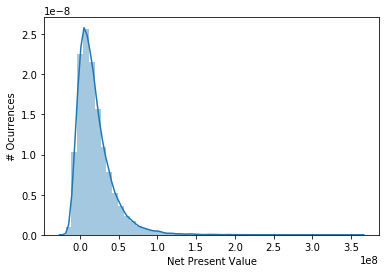

In [9]:
ax = sns.distplot(simulations2_npv)
plt.xlabel('Net Present Value')
plt.ylabel('# Ocurrences')

In [10]:
class GoldMineExercise3(GoldMineExerciseBase):
    def __init__(self):
        GoldMineExerciseBase.__init__(self)
        self._gold_cost = 250
        self._gold_extraction_fixed_costs = 1_000_000 
        self._mine_startup_cost = 2_000_000
        self._mine_shutdown_cost = 1_500_000
        self._number_of_years = 20
        
    def _create_simulation(self, simulation_index):
        simulation_columns = [
            'simulation', 'year', 'gold_price', 'gold_cost', 'gold_quantity',
            'opened_mine', 'open_cut', 'closed_mine', 'close_cut', 'mine_is_open'
        ]
        
        simulation_df = pd.DataFrame(columns = simulation_columns)
        gold_year_prices = self.run_mine_year_simulation()
        
        output_rows = []
        
        for i in range(0, self._number_of_years):
            mine_is_open = self._is_mine_open_flag(output_rows, i)
            gold_price = gold_year_prices[i]
            
            output_rows.append({
                'year': i, 
                'simulation': simulation_index,
                'gold_price': gold_price, 
                'gold_cost': self._gold_cost,
                'gold_quantity': self._gold_extraction_quantity if mine_is_open else 0,
                'mine_is_open': mine_is_open,
                'closed_mine': self._close_mine_flag(random.randint(0, 2000), gold_price, mine_is_open),
                'opened_mine': self._open_mine_flag(random.randint(0, 300), gold_price, mine_is_open)
            })
        
        return pd.DataFrame(output_rows)
    
    def _calc_status_based_costs(self, mine_is_open, close_flag, open_flag):
        return (0 if mine_is_open else self._gold_extraction_fixed_costs) + (self._mine_shutdown_cost if close_flag else 0) + (self._mine_startup_cost if open_flag else 0)
    
    def _previous_base_cash_flow_or_zero(self, output_rows, year):
        0 if year == 0 else output_rows[year]['base_cash_flow']
    
    def _is_mine_open_flag(self, output_rows, year):
        return True if year == 0 else (output_rows[year - 1]['mine_is_open'] and not output_rows[year - 1]['closed_mine']) or output_rows[year - 1]['opened_mine']
    
    def _open_mine_flag(self, cut_open, gold_price, is_open_flag):
        return not is_open_flag and gold_price > cut_open
    
    def _close_mine_flag(self, cut_close, gold_price, is_open_flag):
        return is_open_flag and gold_price <= cut_close
    
    def create_simulations(self, number_of_simulations):
        simulations = [self._create_simulation(i) for i in range(0, number_of_simulations)]

        return pd.concat(simulations, ignore_index = True)
    
    def add_profit_and_npv_to_df(self, simulations_df):
        cash_flow_multiplier = simulations_df['mine_is_open'].map(lambda mine_is_open: 1 if mine_is_open else 0)
        base_cash_flow = (simulations_df['gold_price'] - simulations_df['gold_cost']) * simulations_df['gold_quantity'] * cash_flow_multiplier
        fixed_costs = simulations_df.year.map(lambda i: self._calc_status_based_costs(simulations_df.iloc[i]['mine_is_open'], simulations_df.iloc[i]['closed_mine'], simulations_df.iloc[i]['opened_mine']))
        
        simulations_df['fixed_costs'] = fixed_costs
        simulations_df['profit'] = base_cash_flow - fixed_costs
        simulations_df['npv'] = simulations_df['profit'] * simulations_df['year'].map(lambda year: self.calc_year_risk_from_index(year))

In [11]:
third_exercise = GoldMineExercise3() 
simulations3_df = third_exercise.create_simulations(50_000)
#third_exercise.add_profit_and_npv_to_df(simulations3_df)
third_exercise.add_profit_and_npv_to_df(simulations3_df)
simulations3_df

,closed_mine,gold_cost,gold_price,gold_quantity,mine_is_open,opened_mine,simulation,year,fixed_costs,profit,npv
0,False,250,400.000000,10000,True,False,0,0,0,1.500000e+06,1.500000e+06
1,False,250,380.423232,10000,True,False,0,1,0,1.304232e+06,1.180118e+06
2,True,250,431.644438,10000,True,False,0,2,1500000,3.164444e+05,2.590827e+05
3,False,250,586.233759,0,False,True,0,3,3000000,-3.000000e+06,-2.222455e+06
4,True,250,507.074550,10000,True,False,0,4,1500000,1.070746e+06,7.177422e+05
5,False,250,534.421384,0,False,True,0,5,3000000,-3.000000e+06,-1.819592e+06
6,False,250,426.338402,10000,True,False,0,6,0,1.763384e+06,9.677657e+05
7,True,250,553.188423,10000,True,False,0,7,1500000,1.531884e+06,7.607112e+05
8,False,250,600.239559,0,False,True,0,8,3000000,-3.000000e+06,-1.347987e+06
9,False,250,438.293925,10000,True,False,0,9,0,1.882939e+06,7.655460e+05


In [12]:
simulations3_npv = simulations3_df.groupby(['simulation'])['npv'].agg(sum)
# Solution for Exercise 3
print('Mean value = ', round(np.mean(simulations3_npv), 2), ' Median  value = ', round(np.median(simulations3_npv), 2))

Mean value =  34756783.63  Median  value =  10420984.31


Text(0, 0.5, '# Ocurrences')

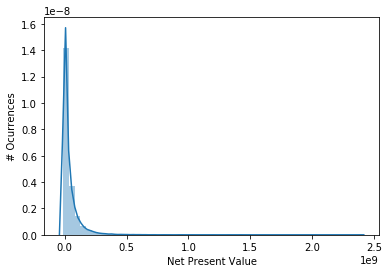

In [13]:
ax = sns.distplot(simulations3_npv)
plt.xlabel('Net Present Value')
plt.ylabel('# Ocurrences')